# XGBoost Regressor
https://www.youtube.com/watch?v=-D2Px4b0XQE

In [ ]:
!pip install XGBoost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 


In [ ]:
#load data
boston = load_boston()

#split data test 15% data train 85%
from sklearn.model_selection import train_test_split
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)



In [ ]:
#define parameter
xgbr = xgb.XGBRegressor(verbosity=0) 

print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [ ]:
#fit model dengan data train
xgbr.fit(xtrain, ytrain)
score= xgbr.score(xtrain,ytrain)
print('Training Score:',score)

Training Score: 0.9707339719017972


In [ ]:
cv_score= cross_val_score(xgbr,xtrain,ytrain
                          ,cv=10)
print("CV mean score:",cv_score.mean())

CV mean score: 0.8725844857789132


In [ ]:
#pake cross validation utk evaluate score
#scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
#print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.89


In [ ]:
#atau bisa juga pake k-fold dalam cross validation
#kfold = KFold(n_splits=10, shuffle=True)
#kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
#print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.89


In [ ]:
#predict data test dan cek akurasi serta pake MSE dan RMSE sbg metrix akurasi
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)


MSE: 16.29


In [ ]:

print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 4.04


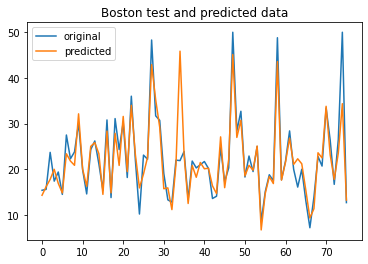

In [ ]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()